## 서울시에서 공개한 코로나19 발생동향 분석
* http://www.seoul.go.kr/coronaV/coronaStatus.do

## 분석에 사용할 Pandas 주요기능
* Pandas cheat sheet 를 함께 보세요! : [Pandas_Cheat_Sheet.pdf](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

* 파일 불러오기
    * to_csv("파일명", index=False) : csv 파일로 저장하기
    * read_csv("파일명") : csv 파일 불러오기
    
* Pandas를 통한 파일 저장과 불러오기
    * shape를 통한 행과 열의 수 보기
    * head, tail, sample 을 통한 일부 데이터 가져오기
    
* DataFrame의 info(), describe() 등을 통한 요약과 기술통계 값 구하기
    * info()
    * describe()
    * nunique()
    * index
    * columns
    * values
    
* Pandas의  DataFrame과 Series의 이해
    * Series : 1차원 벡터구조
    * DataFrame : 2차원 행렬구조
    
* 색인하기
    * [컬럼]
    * .loc[행]
    * .loc[행, 열]
    * .loc[조건식, 열]
    
* DataFrame의 데이터 타입 이해하기
    * 날짜 데이터의 변환
    
* DataFrame 다루기
    * 열(column) 인덱싱
    * 행(index) 인덱싱
    * 행, 열 인덱싱
    * 정렬하기 : sort_values 사용하기
    * 조건식 사용하기

* 빈도수 구하기
    * 한 개의 변수 : series.value_counts()
    * 두 개의 변수 : pd.crosstab()

* groupby 와 pivot_table
    * 다양한 연산식의 사용


## 라이브러리 로드

In [1]:
# pandas, numpy, matplotlib.pyplot 불러오기

# 네개의 파일을 붙여보는 것을 할 것이에요.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 시각화 기본 명칭 확인하기
* [Anatomy of a figure — Matplotlib documentation](https://matplotlib.org/stable/gallery/showcase/anatomy.html)

## 시각화 한글폰트 설정하기

In [2]:
# 윈도우 : "Malgun Gothic"
# 맥 : "AppleGothic"
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family


plt.style.use("seaborn-whitegrid")

# 폰트설정
plt.rc("font", family=get_font_family())
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats

set_matplotlib_formats("retina")

/var/folders/qw/j72d9nwn5dq0vxtqtw2bbtnh0000gp/T/ipykernel_3094/3064774803.py:39: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("retina")


<AxesSubplot:>

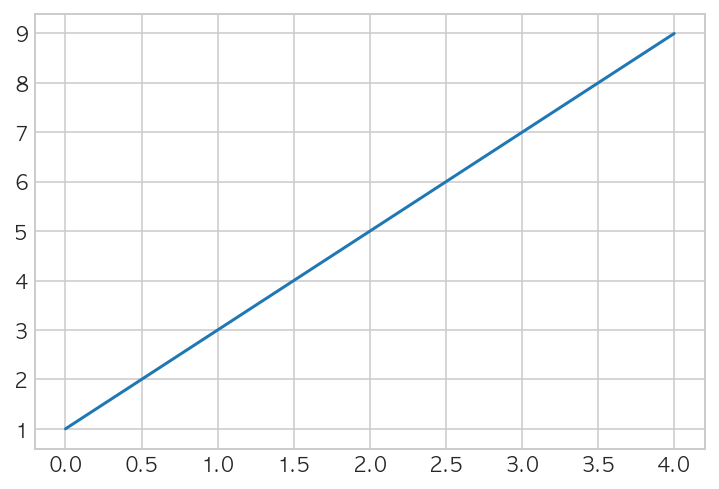

In [3]:
# 그래프 그려보기

pd.Series([1,3,5,7,9]).plot()

<AxesSubplot:title={'center':'한글'}>

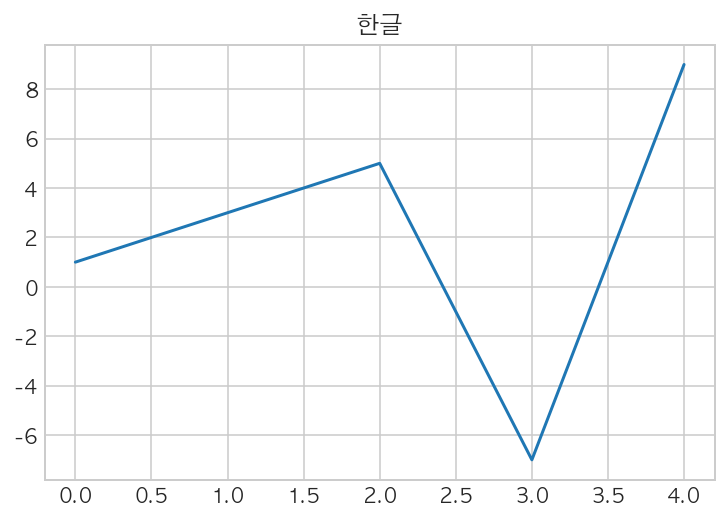

In [4]:
pd.Series([1,3,5,-7,9]).plot(title="한글") # 한글 폰트 잘 그려지는지 알아보기

## 파일 불러오기
<img src="https://pandas.pydata.org/docs/_images/02_io_readwrite.svg">

In [7]:
%ls data 

seoul-covid19-2021-01-03.csv  seoul-covid19-2021-09-11.csv
seoul-covid19-2021-05-11.csv  seoul-covid19-2021-11-22.csv


In [8]:
# seoul-covid19-2021-01-03.csv 불러오기! 하나씩 불러와보자.
# df_01 변수에 담아 재사용합니다.
# df_01

df_01 = pd.read_csv("data/seoul-covid19-2021-01-03.csv")
df_01.shape

(20000, 7)

In [9]:
# csv 불러오기
# df_02 변수에 담아 재사용합니다.
# df_02

df_02 = pd.read_csv("data/seoul-covid19-2021-05-11.csv")
df_02.shape

# 회사 가도 로그데이터(임시성이 있는 데이터)들은 이렇게 날짜별로 끊어서 저장되어있을 때가 있다.

(20000, 7)

In [10]:
df_03 = pd.read_csv("data/seoul-covid19-2021-09-11.csv")
df_04 = pd.read_csv("data/seoul-covid19-2021-11-22.csv")
df_01.shape, df_02.shape, df_03.shape, df_04.shape

((20000, 7), (20000, 7), (46462, 7), (62913, 7))

## head, tail, sample 로 일부 데이터만 보기

In [11]:
# 일부데이터만 가져와보기
df_01.head()

# 연번은 서울시 연번, 환자 번호는 전국에서의 번호이다.

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,20000,64010,2021-01-03,종로구,-,타시도 확진자 접촉,퇴원
1,19999,64155,2021-01-03,강서구,-,감염경로 조사중,퇴원
2,19998,64083,2021-01-03,노원구,-,기타 확진자 접촉,퇴원
3,19997,64263,2021-01-02,마포구,-,기타 확진자 접촉,퇴원
4,19996,64264,2021-01-02,광진구,-,감염경로 조사중,퇴원


In [12]:
# 일부데이터만 가져와보기
df_02.tail()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
19995,39996,128410,2021-05-11,노원구,-,감염경로 조사중,퇴원
19996,39997,128478,2021-05-11,양천구,-,감염경로 조사중,퇴원
19997,39998,128724,2021-05-11,강남구,-,기타 확진자 접촉,퇴원
19998,39999,128347,2021-05-11,강북구,-,기타 확진자 접촉,퇴원
19999,40000,128576,2021-05-11,양천구,-,양천구 소재 직장 관련('21.5.),퇴원


회사에서 뭐 분석해주세요 했을때, 이렇게 나누어서 주면 직접 합쳐서 써야 한다. 회사는 하나에 넣는게 부담이니까.

In [13]:
# 일부데이터만 가져와보기
df_03.sample(10)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
45664,40798,130486,2021-05-14,은평구,-,은평구 소재 종교시설 관련('21.5.(2)),퇴원
19375,67087,208107,2021-08-06,강동구,-,기타 확진자 접촉,퇴원
8115,78347,248018,2021-08-28,동작구,-,감염경로 조사중,퇴원
21930,64532,199524,2021-07-31,서초구,-,감염경로 조사중,퇴원
32955,53507,165191,2021-07-08,광진구,-,기타 확진자 접촉,퇴원
36473,49989,157139,2021-06-30,동작구,-,타시도 확진자 접촉,퇴원
22394,64068,198262,2021-07-30,강동구,-,기타 확진자 접촉,퇴원
5912,80550,255193,2021-09-01,강동구,-,기타 확진자 접촉,NaN
18607,67855,209919,2021-08-07,구로구,-,감염경로 조사중,퇴원
27560,58902,179354,2021-07-19,마포구,-,기타 확진자 접촉,퇴원


## concat 으로 여러 개의 데이터프레임 합치기


* axis = 0

<img src="https://pandas.pydata.org/docs/_images/merging_concat_basic.png">

* axis = 1 
<img src="https://pandas.pydata.org/docs/_images/merging_concat_axis1.png">

* 결측치를 제외하기 join="inner"
<img src="https://pandas.pydata.org/docs/_images/merging_concat_axis1_inner.png">


* [Merge, join, concatenate and compare documentation](https://pandas.pydata.org/docs/user_guide/merging.html#merge-join-concatenate-and-compare)

컬럼이 같고 기간 데이터만 다르다, 전체 기간을 보고싶다, 하면 하나로 합치게 될때 이때 axis = 0은 위아래로, axis = 1은 가로로.

JOIN을 쓸 경우 똑같은 컬럼값이 있는데 이름이 다를때 JOIN으로 합쳐줄 수 있다.

In [14]:
# pd.concat 으로 [df_01, df_02] 합치고 df 변수에 할당하기
# df

df_all = pd.concat([df_01, df_02, df_03, df_04])
df_all.shape

# 콘캣은 함수이다. 그리고 한번에 여러 값을 넣을 것이기 때문에 리스트의 형태로 넣었다.
# axis 는 기본값이 0이라 세로로 합쳐졌다.
# 149375, 7! 갯수가 같은지 확인하세요!
# 만약 다른 컬럼이 있으면, 다른 컬럼이 없는 곳에는 결측치로 들어가게 된다.
# 퇴원현황에 결측치는 아마도... 치료중이 있음.

(149375, 7)

In [15]:
# axis =1 이게 되면 그냥 옆으로 쭉 붙게 된다.

## 합친 데이터 확인하기

In [16]:
# head, tail, sample 을 통해 데이터 확인하기
df_all.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,20000,64010,2021-01-03,종로구,-,타시도 확진자 접촉,퇴원
1,19999,64155,2021-01-03,강서구,-,감염경로 조사중,퇴원
2,19998,64083,2021-01-03,노원구,-,기타 확진자 접촉,퇴원
3,19997,64263,2021-01-02,마포구,-,기타 확진자 접촉,퇴원
4,19996,64264,2021-01-02,광진구,-,감염경로 조사중,퇴원


In [17]:
df_all.tail()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
62908,80005,252109,2021-08-31,서초구,-,기타 확진자 접촉,NaN
62909,80004,252107,2021-08-31,서초구,-,기타 확진자 접촉,퇴원
62910,80003,252106,2021-08-31,서초구,-,기타 확진자 접촉,퇴원
62911,80002,252861,2021-08-31,타시도,-,감염경로 조사중,퇴원
62912,80001,253226,2021-08-31,관악구,-,기타 확진자 접촉,퇴원


In [18]:
df_all.shape

(149375, 7)

## 중복 제거하기

In [19]:
df_all.sample(20).sort_values('연번')

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
9450,10550,38425,2020-12-07,관악구,-,감염경로 조사중,퇴원
8121,28122,89380,2021-02-27,중랑구,-,기타 확진자 접촉,퇴원
9014,29015,92363,2021-03-06,동대문구,-,병원 및 요양시설,퇴원
16707,36708,118847,2021-04-24,광진구,-,감염경로 조사중,퇴원
37447,49015,155061,2021-06-26,타시도,-,기타 확진자 접촉,퇴원
27420,59042,180681,2021-07-20,중랑구,-,감염경로 조사중,퇴원
13780,72682,229602,2021-08-18,마포구,-,기타 확진자 접촉,퇴원
11209,75253,238930,2021-08-23,서초구,-,감염경로 조사중,퇴원
10822,75640,239835,2021-08-24,양천구,-,감염경로 조사중,퇴원
59424,83489,264372,2021-09-07,관악구,-,감염경로 조사중,퇴원


In [20]:
df_all[df_all.duplicated('연번', keep=False)].sort_values('연번')

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
6461,80001,251550,2021-08-31,중구,-,감염경로 조사중,퇴원
62912,80001,253226,2021-08-31,관악구,-,기타 확진자 접촉,퇴원
62911,80002,252861,2021-08-31,타시도,-,감염경로 조사중,퇴원
6460,80002,253226,2021-08-31,관악구,-,기타 확진자 접촉,NaN
6459,80003,252861,2021-08-31,타시도,-,감염경로 조사중,NaN
...,...,...,...,...,...,...,...
56453,86460,272107,2021-09-11,타시도,-,감염경로 조사중,NaN
1,86461,272107,2021-09-11,타시도,-,감염경로 조사중,NaN
56452,86461,272906,2021-09-11,강동구,-,감염경로 조사중,NaN
56451,86462,273536,2021-09-12,중랑구,-,감염경로 조사중,퇴원


In [21]:
# df[df.duplicated(keep=False)].sort_values('연번') 이름 지정해줬으니 안씀.

In [22]:
df = df_all.drop_duplicates('연번', keep = 'last').sort_values('연번', ascending=False) 
df.shape

#keep=last 나중에 수집한것은 퇴원이 있고 없고 다를 수 있으니까 나중의 데이터를 쓰겠다고 한 것 때문에 틀려졌다.

(142913, 7)

In [23]:
# df_all.drop_duplicates('연번')

In [24]:
# 앞을 남길건지 뒤를 남길건지 ()안에 할 수 있다.
#df = df_all.drop_duplicates('연번')

In [25]:
#df = df_all.drop_duplicates('연번').sort_values('연번', ascending=False)
#df.shape

In [26]:
#df00 = df[df.duplicated(['연번','환자'], keep=False)].sort_values('연번', ascending=False)  
# 어센딩 큰것부터 작은거로...
#df00.shape
# ???????

이상해. 잠시 여기 아래는 승아님 필기 가져옴

## 인덱스 값 설정하기
* 전체 데이터프레임의 행의 갯수와 "연번"의 유일값을 확인하면 중복값이 없는 것으로 확인할 수 있습니다.
* shape와 nunique()로 행의 수와 유일값이 일치하는지 확인합니다.

In [27]:
# shape
df.shape

(142913, 7)

In [28]:
# 연번의 nunique()
df['연번'].nunique()

142913

In [29]:
# set_index 를 통해 인덱스 값을 변경합니다.
df = df.set_index('연번')
# 이것 두번 실행하면 오류나요 이미 인덱스 로 바꿔줬기 때문에 연번이라는 컬럼이 없다.

## 연번 순으로 정렬하기

In [30]:
# sort_index 를 통해 인덱스값 기준으로 정렬합니다.
df

,환자,확진일,거주지,여행력,접촉력,퇴원현황
연번,,,,,,
142913,420784,2021-11-22,동대문구,-,감염경로 조사중,NaN
142912,420761,2021-11-22,양천구,-,감염경로 조사중,NaN
142911,420734,2021-11-22,송파구,-,기타 확진자 접촉,NaN
142910,420707,2021-11-22,양천구,-,기타 확진자 접촉,NaN
142909,420693,2021-11-22,영등포구,-,감염경로 조사중,NaN
...,...,...,...,...,...,...
5,9,2020-01-31,성북구,-,기타 확진자 접촉,퇴원
4,7,2020-01-30,마포구,중국,해외유입,퇴원
3,6,2020-01-30,종로구,-,종로구 집단발병,퇴원


In [31]:
# head 로 미리보기 합니다.
df.head()

,환자,확진일,거주지,여행력,접촉력,퇴원현황
연번,,,,,,
142913,420784,2021-11-22,동대문구,-,감염경로 조사중,NaN
142912,420761,2021-11-22,양천구,-,감염경로 조사중,NaN
142911,420734,2021-11-22,송파구,-,기타 확진자 접촉,NaN
142910,420707,2021-11-22,양천구,-,기타 확진자 접촉,NaN
142909,420693,2021-11-22,영등포구,-,감염경로 조사중,NaN


In [32]:
# tail로 미리보기 합니다.
df.tail()

,환자,확진일,거주지,여행력,접촉력,퇴원현황
연번,,,,,,
5,9,2020-01-31,성북구,-,기타 확진자 접촉,퇴원
4,7,2020-01-30,마포구,중국,해외유입,퇴원
3,6,2020-01-30,종로구,-,종로구 집단발병,퇴원
2,5,2020-01-30,중랑구,중국,해외유입,퇴원
1,2,2020-01-24,강서구,중국,해외유입,퇴원


## 판다스의 attributes
* [Series — pandas documentation](https://pandas.pydata.org/docs/reference/series.html#attributes)
* [DataFrame — pandas documentation](https://pandas.pydata.org/docs/reference/frame.html#attributes-and-underlying-data)

괄호가 안들어간다. 판다스 API의 약속이다. 위 링크에 들어가면 시리즈와 데이터프레임에 따라서 다르다.

메소드가 아닌것들은 괄호가 안들어간다.

외우기 어렵고 외울 생각도 않는다. 연습 많이 하고, 치트슅 보는것에 익숙해지자.


In [33]:
# shape
df.shape

(142913, 6)

In [34]:
# dtypes
df.dtypes

환자       int64
확진일     object
거주지     object
여행력     object
접촉력     object
퇴원현황    object
dtype: object

In [35]:
# columns
df.columns

Index(['환자', '확진일', '거주지', '여행력', '접촉력', '퇴원현황'], dtype='object')

In [36]:
# index
df.index

Int64Index([142913, 142912, 142911, 142910, 142909, 142908, 142907, 142906,
            142905, 142904,
            ...
                10,      9,      8,      7,      6,      5,      4,      3,
                 2,      1],
           dtype='int64', name='연번', length=142913)

## 데이터 요약

In [37]:
# info를 통해 데이터를 요약합니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142913 entries, 142913 to 1
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   환자      142913 non-null  int64 
 1   확진일     142913 non-null  object
 2   거주지     142913 non-null  object
 3   여행력     142913 non-null  object
 4   접촉력     142913 non-null  object
 5   퇴원현황    115750 non-null  object
dtypes: int64(1), object(5)
memory usage: 7.6+ MB


퇴원 현황이 비어있는 것이 많다. 정말 안했거나 수집되는 동안 서버에 잠깐 장애가 일어나서 누락이 되었다던가, 여러 사유에 의해 결측치가 발생할 수 있다. 비어있는 컬럼일 때에는...? 

## 결측치 보기

In [38]:
# 결측치의 합계를 구합니다.
# isnull()
df.isnull().sum()

환자          0
확진일         0
거주지         0
여행력         0
접촉력         0
퇴원현황    27163
dtype: int64

In [39]:
# 평균(mean)을 통해 결측치의 비율을 구합니다.
df.isnull().mean() * 100

환자       0.000000
확진일      0.000000
거주지      0.000000
여행력      0.000000
접촉력      0.000000
퇴원현황    19.006668
dtype: float64

In [40]:
df['퇴원현황'].value_counts()

퇴원    114801
사망       949
Name: 퇴원현황, dtype: int64

## 기술통계

In [41]:
# describe()로 기술통계 값을 구합니다.
df.describe()

,환자
count,142913.000000
mean,221185.693681
std,122665.615932
min,2.000000
25%,114987.000000
50%,224530.000000
75%,330388.000000
max,420950.000000


In [42]:
# describe(include="object") 로 문자 데이터에 대한 기술통계 값을 구합니다.
df.describe(include='object')
#만약 같을 때는 랜덤으로 나온다 거주지 송파 혹은 강남. 다를 때 아래를 본다.

,확진일,거주지,여행력,접촉력,퇴원현황
count,142913,142913,142913,142913,115750
unique,637,31,176,1286,2
top,2021-11-16,송파구,-,기타 확진자 접촉,퇴원
freq,1436,8791,140948,57235,114801


In [43]:
df['거주지'].value_counts().head(10) 

송파구     8791
강남구     8791
관악구     7487
구로구     7143
타시도     7137
영등포구    6884
강서구     6377
은평구     6021
성북구     5906
강동구     5899
Name: 거주지, dtype: int64

## 날짜 데이터 타입 변경하기

* 확진일 Series 형태로 가져오기
<img src="https://pandas.pydata.org/docs/_images/01_table_series.svg">

In [44]:
# 확진일 Series 형태로 가져오기
df["확진일"].tail(1)

연번
1    2020-01-24
Name: 확진일, dtype: object

In [45]:
# pd.to_datetime 을 통한 데이터 타입 변경하기
# 비슷한 기능인 implace는 덮어쓰게 되는 기능이지만,
# 메소드 체이닝을 하게되면 임플레이스가 작동하지 않아서 이 기능을 없앨 예정이라고.
df['확진일'] = pd.to_datetime(df['확진일'])

In [46]:
# df["확진일"]을 head() 로 일부만 가져와서 타입이  datetime64 형태로 변경되었는지 확인하기
df['확진일'].head(2)

연번
142913   2021-11-22
142912   2021-11-22
Name: 확진일, dtype: datetime64[ns]

## 파생변수 만들기
### 연, 월, 일, 요일 만들기

df[컬럼]=df[컬럼].dt.어쩌구

In [47]:
# 연도 파생변수 만들기
# df["연도"]

df['연도'] = df['확진일'].dt.year

In [48]:
# 월(month), 일(day), 요일(dayofweek) 만들기
# df["월"]
# df["일"]
# df["요일"]

df['월'] = df['확진일'].dt.month
df['일'] = df['확진일'].dt.day
df['요일'] = df['확진일'].dt.dayofweek

In [49]:
# 확진일, 연도, 월, 일, 요일 컬럼만 가져오기
# head 로 일부만 가져와 파생변수가 잘 생성되었는지 확인하기

df.head()

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일
연번,,,,,,,,,,
142913,420784,2021-11-22,동대문구,-,감염경로 조사중,NaN,2021,11,22,0
142912,420761,2021-11-22,양천구,-,감염경로 조사중,NaN,2021,11,22,0
142911,420734,2021-11-22,송파구,-,기타 확진자 접촉,NaN,2021,11,22,0
142910,420707,2021-11-22,양천구,-,기타 확진자 접촉,NaN,2021,11,22,0
142909,420693,2021-11-22,영등포구,-,감염경로 조사중,NaN,2021,11,22,0


월이나 요일등으로 쪼개서 보기 위해 이렇게 만듭니다.

월별로 빈도수를 구하게 되면 작년만 있기 때문에 연도와 월을 붙여 만듭시다.

### 연도-월 만들기

In [50]:
# 연도-월 파생변수 만들기 1 - 추천방법
# astype(str) 을 통해 수치 데이터를 문자 데이터로 변환하고 문자열 연결하기
# df["연도월"]

df['확진일'].astype(str).str[:7]

연번
142913    2021-11
142912    2021-11
142911    2021-11
142910    2021-11
142909    2021-11
           ...   
5         2020-01
4         2020-01
3         2020-01
2         2020-01
1         2020-01
Name: 확진일, Length: 142913, dtype: object

In [51]:
# 연도-월 파생변수 만들기 2
# 문자열 슬라이싱으로도 만들 수 있습니다.
# df["연도월"]

df["연도"].astype(str) + "-" + df["월"].astype(str)

연번
142913    2021-11
142912    2021-11
142911    2021-11
142910    2021-11
142909    2021-11
           ...   
5          2020-1
4          2020-1
3          2020-1
2          2020-1
1          2020-1
Length: 142913, dtype: object

In [52]:
# df["연도월"]에 넣고, 잘 생성되었는지 확인하기

df["연도월"] = df["확진일"].astype(str).str[:7]
df.head()

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일,연도월
연번,,,,,,,,,,,
142913,420784,2021-11-22,동대문구,-,감염경로 조사중,NaN,2021,11,22,0,2021-11
142912,420761,2021-11-22,양천구,-,감염경로 조사중,NaN,2021,11,22,0,2021-11
142911,420734,2021-11-22,송파구,-,기타 확진자 접촉,NaN,2021,11,22,0,2021-11
142910,420707,2021-11-22,양천구,-,기타 확진자 접촉,NaN,2021,11,22,0,2021-11
142909,420693,2021-11-22,영등포구,-,감염경로 조사중,NaN,2021,11,22,0,2021-11


### 요일 한글로 만들기
* 함수와 Series의 map 활용

In [53]:
dayofweek = "월화수목금토일"
dayofweek[1]

'화'

In [54]:
#find_dayofweek 함수로 요일 숫자를 넘겨주면 요일명을 반환하는 함수
#dayofweek으로 했을 때 월요일이 인덱스 0이라는 것을 이용하자.
#그럼 함수 명명할 때에도 0에 월요일부터 들어가도록 해주면 된다! 

# def find_dayofweek(day_no):

def find_dayofweek(day_no):
    dayofweek = "월화수목금토일"
    return dayofweek[day_no]

In [55]:
# 함수가 잘 만들어졌는지 확인하기

find_dayofweek(0), find_dayofweek(3)

('월', '목')

In [56]:
# map을 사용해서 요일 컬럼을 요일명으로 변환하고 "요일명"이라는 새로운 컬럼에 저장하기
# df["요일명"]

# 시리즈(컬럼 하나)에 쓸 땐 map을 그냥 쓰면 됩니다.

df["요일명"] = df["요일"].map(find_dayofweek)

In [57]:
# ["요일", "요일명"]을 sample(5) 로 임의의 5개만 불러와 잘 변환이 되었는지 확인하기
# 컬럼 둘이니까 시리즈로 묶어주는거 까먹지 말자구요.

df[["요일", "요일명"]].sample(5)

,요일,요일명
연번,,
89176,3,목
31841,0,월
49072,5,토
125485,5,토
119831,6,일


## 전체 수치 변수 히스토그램 그리기

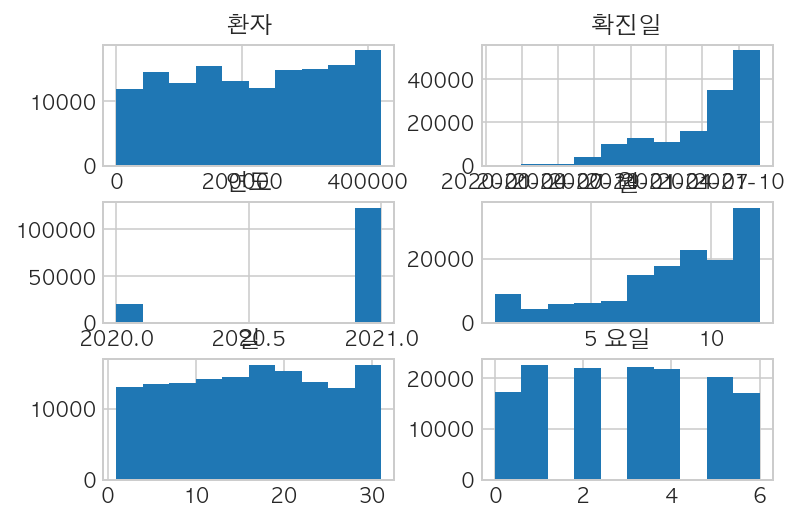

In [58]:
# df.hist로 히스토그램 그리기

_ = df.hist()

시계열 데이터에서 요일은 웬만하면 의미를 갖는 경우가 많다. 

주말에는 검사수가 적어서 월요일 같은 때 적은 것이 실제로 보인다

**여기서 질문.... 아 표 이름 바꾸고 싶어요.**

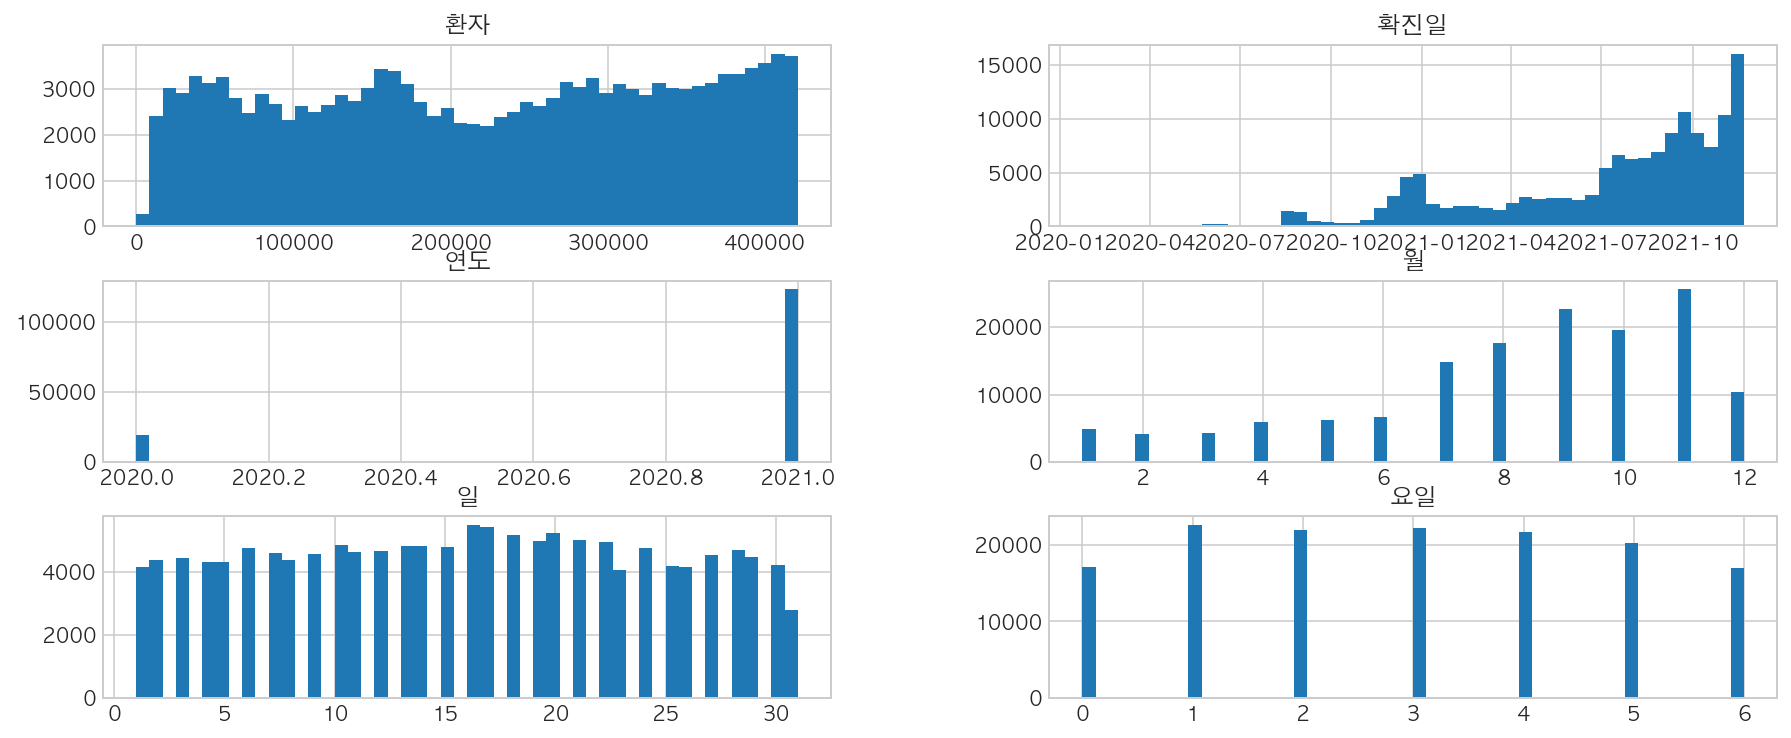

In [59]:
# 히스토그램 크기와 막대갯수(구간나눌갯수) 조정하기

_ = df.hist(figsize=(15,6), bins=50)

## value_counts로 하나의 변수에 대한 빈도수 구하기
### 연도

In [60]:
# "연도" 컬럼을 통해 빈도수 구하기
df["연도"].value_counts()

2021    123521
2020     19392
Name: 연도, dtype: int64

In [61]:
# "연도" 컬럼의 비율 구하기
df["연도"].value_counts(normalize=True)

2021    0.864309
2020    0.135691
Name: 연도, dtype: float64

In [62]:
# "연도" 컬럼의 비율 구하기
df["연도"].value_counts(normalize=True) * 100 

2021    86.430906
2020    13.569094
Name: 연도, dtype: float64

### 연도월

In [63]:
# 연도월에 대한 빈도수 구하기
# 빈도수를 구하고 sort_index() 로 정렬합니다. sort_index 해도 나오긴 나오네
# year_month

year_month = df["연도월"].value_counts().sort_index()

<AxesSubplot:>

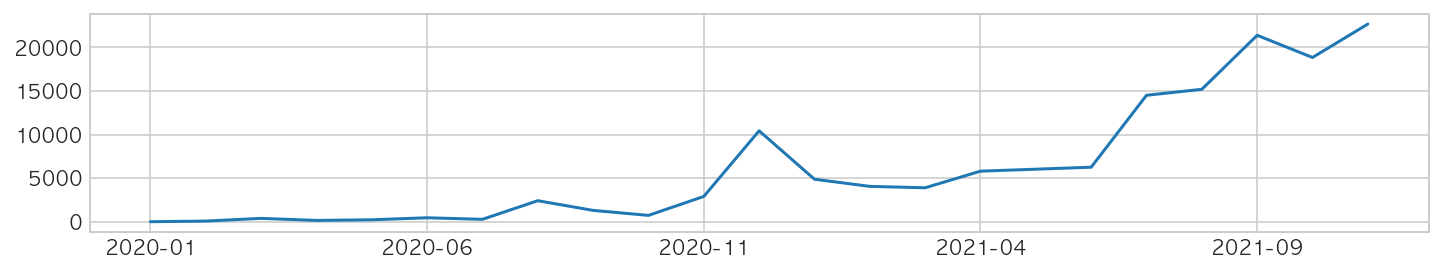

In [64]:
# 연도월을 시각화 합니다.
year_month.plot(figsize=(12,2))

<AxesSubplot:>

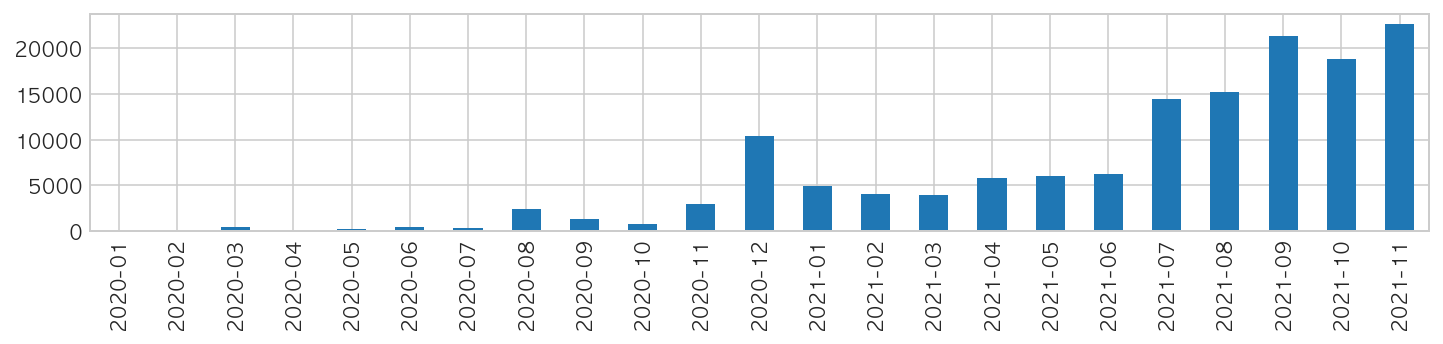

In [65]:
# 연도월을 막대 그래프로 시각화 합니다.
year_month.plot.bar(figsize=(12,2))

#figsize 하고 이퀄 쓰는 것 작작 빠뜨리세요.

10월에 좀 줄어든것 같이 보이는데, 결측치가 있지 않을까 생각을 하신다고.

위에 것은 생략이 되어 나온다. 그래서 두 그래프가 크다.

막대그래프는 범주형 데이터를 보는데 적합, 선그래프는 연속된 수치형 데이터를 보는데 적합하다.

선그래프는 그래서 임의로 그려지는 부분도 있게 되는 것이지.

### 요일별 빈도수 구하기

In [66]:
# 빈도수 구하고 인덱스 번호로 정렬합니다.
# weekday_count 변수에 담아 재사용합니다.
# weekday_count

weekday_count = df["요일"].value_counts().sort_index()
weekday_count

#요일에 인덱스번호가 매겨졌조. 그것을 각 요일별로 몇개 있는지 세어보았어요.

0    17149
1    22643
2    21963
3    22218
4    21737
5    20224
6    16979
Name: 요일, dtype: int64

In [67]:
# 리스트컴프리헨션 사용해서 '간단하게!' 리스트 만들기
# "월화수목금토일" 리스트로 만들어 weekday_list 변수로 재사용하기
# weekday_list

weekday_list = [w for w in '월화수목금토일']
weekday_list

#리스트를 만들었어요. 순서대로 하나씩 나오도록 하는 리스트에요. 굉장히 편하고, 한 번 쓰면 계속 쓰게 될 거에요.

['월', '화', '수', '목', '금', '토', '일']

In [68]:
#그럼 이제 그 리스트를 인덱스로 넣어주어요.

weekday_count.index = weekday_list
weekday_count

월    17149
화    22643
수    21963
목    22218
금    21737
토    20224
일    16979
Name: 요일, dtype: int64

In [69]:
# 만약 직접 했어야 한다면
#weekday_list = []
#for w in '월화수목금토일':
#    weekday_list.append(w)

#weekday_list

<AxesSubplot:>

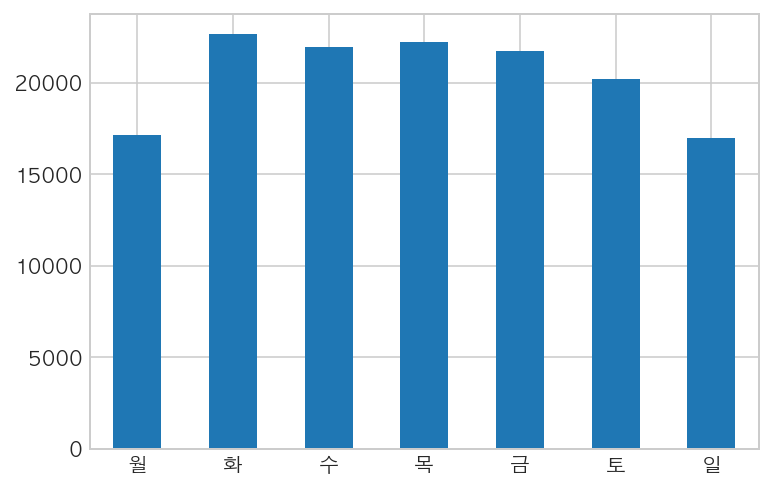

In [70]:
# 인덱스 값을 요일명으로 변경하고 시각화 합니다.
# weekday_count.index
weekday_count.index = weekday_list
weekday_count.plot.bar(rot=0)

### 확진일 빈도수 구하기

In [71]:
# df["확진일"] 빈도수 구하고 인덱스 값인 날짜로 정렬하기
# day_count

day_count = df["확진일"].value_counts()
day_count

2021-11-16    1436
2021-11-17    1429
2021-11-18    1401
2021-11-19    1373
2021-11-20    1320
              ... 
2020-04-18       1
2020-03-05       1
2020-02-02       1
2020-04-15       1
2020-01-24       1
Name: 확진일, Length: 637, dtype: int64

<AxesSubplot:>

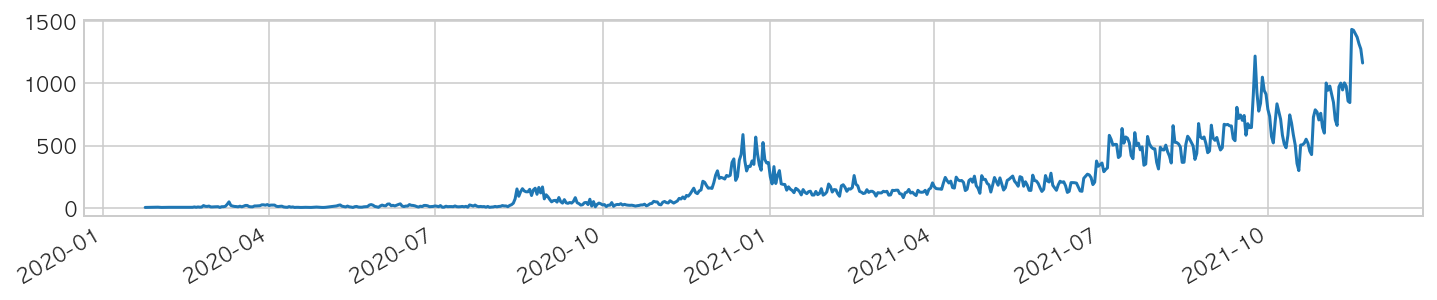

In [72]:
# 선 그래프로 시각화 하기
day_count.plot(figsize=(12,2))

나왜 그래프가 거꾸로 나와 어 마링야; 아무튼 11월 24일은 여기까지했어요오

## 전체 확진일 데이터 만들기
### tail로 초기 데이터 보기

In [74]:
# head(10)로 10번째 확진 데이터를 봅니다.

day_count = day_count.sort_index(10)
day_count

/var/folders/qw/j72d9nwn5dq0vxtqtw2bbtnh0000gp/T/ipykernel_3094/3656641854.py:3: FutureWarning: In a future version of pandas all arguments of Series.sort_index will be keyword-only
  day_count = day_count.sort_index(10)


ValueError: No axis named 10 for object type Series

### iloc를 통해 첫 확진일과 마지막 확진일자 찾기

In [78]:
# last_day
last_day = df.iloc[0]["확진일"]
last_day

#회사에서 없는 데이터도 같이 표시해달라고 할 때가 있을때가 많다.

Timestamp('2021-11-22 00:00:00')

In [80]:
# first_day
first_day = df.iloc[-1]["확진일"]
first_day

Timestamp('2020-01-24 00:00:00')

### date_range로 전체 기간 데이터 만들기

In [83]:
# pd.date_range 로 전체 기간을 생성합니다.
# all_day

all_day = pd.date_range(start= first_day, end= last_day)

In [84]:
# all_day 를 데이터프레임으로 변환합니다.

df_all_day = all_day.to_frame()

In [85]:
# "확진수" 라는 컬럼을 생성해서 위에서 구한 day_count 를 추가합니다.
# 확진자가 없는 날도 인덱스에 생성이 됩니다.

df_all_day["확진수"] = day_count
df_all_day.head(10)

# NaN 결측치

,0,확진수
2020-01-24,2020-01-24,1.0
2020-01-25,2020-01-25,NaN
2020-01-26,2020-01-26,NaN
2020-01-27,2020-01-27,NaN
2020-01-28,2020-01-28,NaN
2020-01-29,2020-01-29,NaN
2020-01-30,2020-01-30,3.0
2020-01-31,2020-01-31,3.0
2020-02-01,2020-02-01,NaN
2020-02-02,2020-02-02,1.0


In [86]:
# 필요 없는 0 컬럼을 삭제합니다. 한번 지우면 없기 때문에 두번 치면 에러난다.
# del df_all_day[0]

del df_all_day[0]

### 결측치 채우기

In [87]:
# 비어있는 값은 확진자가 없었던 날이기 때문에 fillna로 0으로 채웁니다.

df_all_day = df_all_day.fillna(0)
df_all_day.head()

,확진수
2020-01-24,1.0
2020-01-25,0.0
2020-01-26,0.0
2020-01-27,0.0
2020-01-28,0.0


<AxesSubplot:>

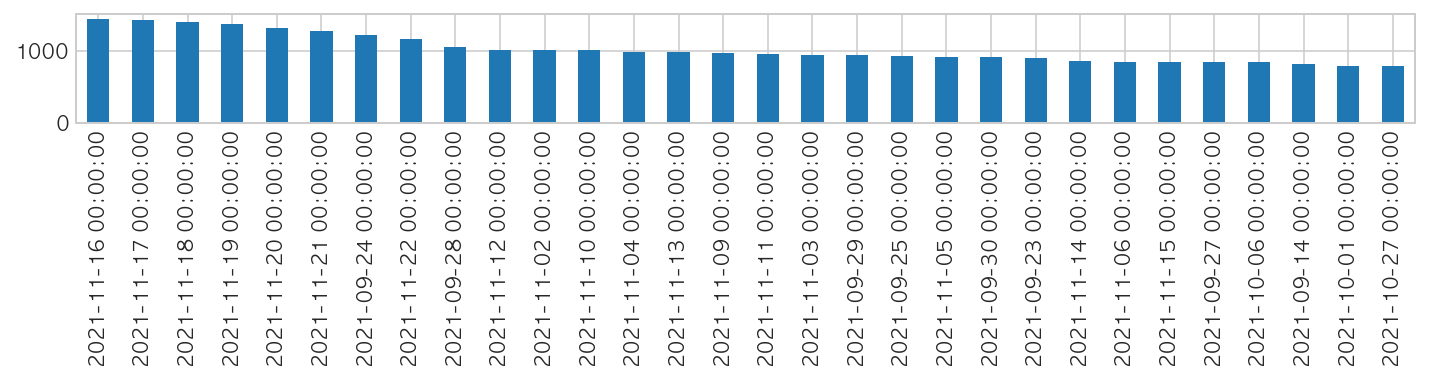

In [89]:
day_count.head(30).plot.bar(figsize=(12,1))

# 매일 있어보이지만 잘 보면 0인 날이 아예 x값으로 나오지 않는다. 그럼 0으로 채워준 그래프를 그려보자.

<AxesSubplot:>

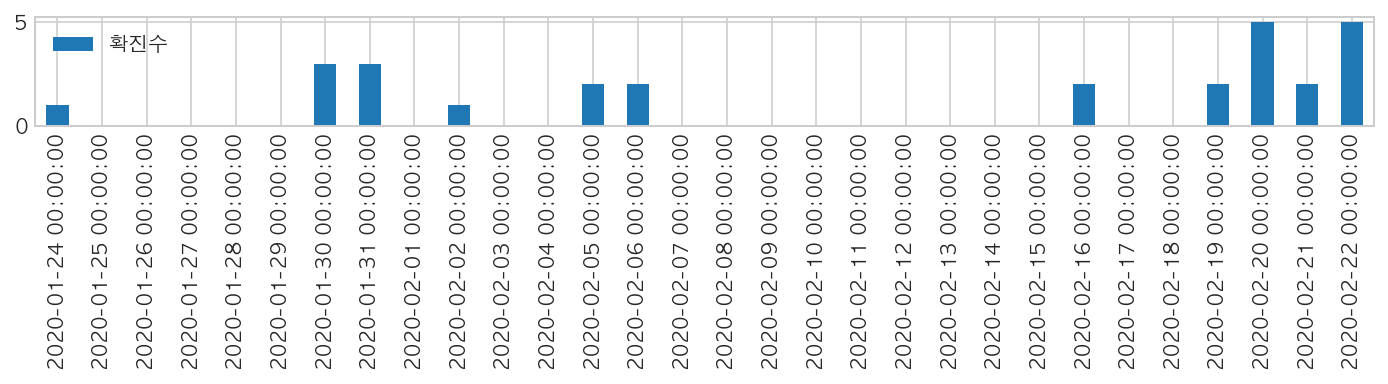

In [90]:
# day_count 에서 초기 30개의 데이터에 대해서 슬라이싱 해서 시각화 합니다.

df_all_day.head(30).plot.bar(figsize=(12,1))

### 누적 확진 수 구하기

In [ ]:
# df

In [91]:
# cumsum 으로 "누적확진수" 구해서 새로운 변수에 담기
# df_all_day["누적확진수"]

df_all_day["확진수"].cumsum() 
# 0이었던 날이 채워지게 된다. 누적으로 보는 것.

2020-01-24         1.0
2020-01-25         1.0
2020-01-26         1.0
2020-01-27         1.0
2020-01-28         1.0
                ...   
2021-11-18    137777.0
2021-11-19    139150.0
2021-11-20    140470.0
2021-11-21    141748.0
2021-11-22    142913.0
Freq: D, Name: 확진수, Length: 669, dtype: float64

In [92]:
df_all_day["누적확진수"] = df_all_day["확진수"].cumsum() 


<AxesSubplot:>

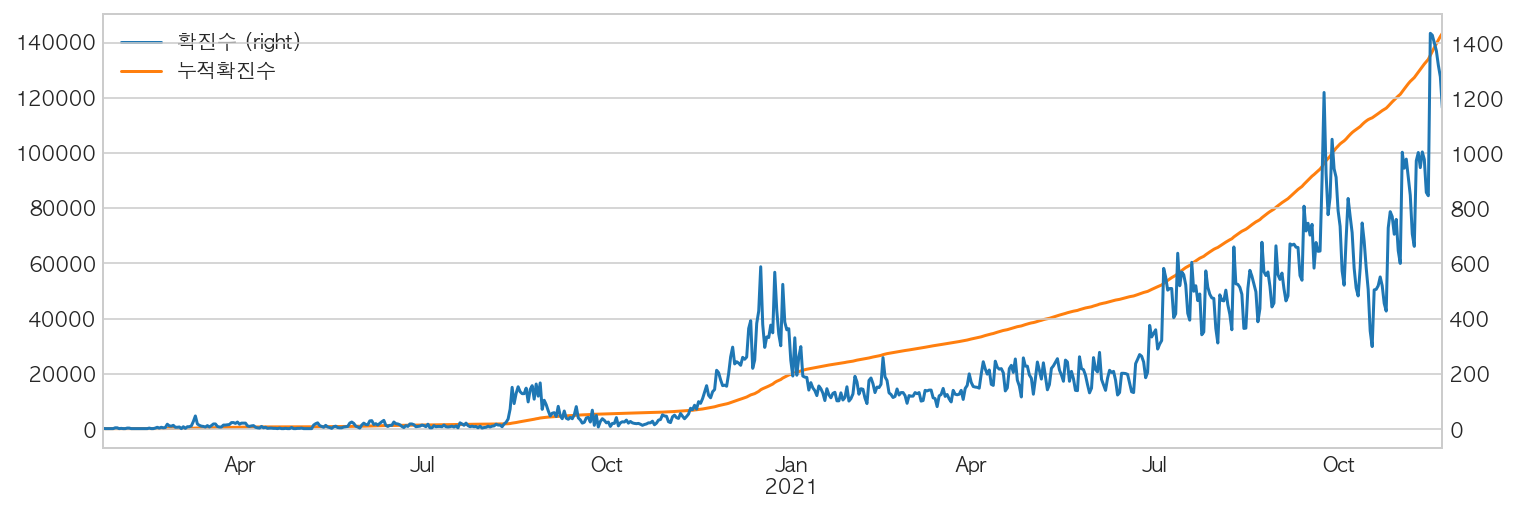

In [94]:
# 시각화 하기. y축에 같이 넛으면 보기가 좋을 수도 있다. 자주 쓰지는 않는다. 그렇기에 서브플롯으로 같이 그릴 수 있다.
df_all_day.plot(secondary_y="확진수", figsize=(12,4))

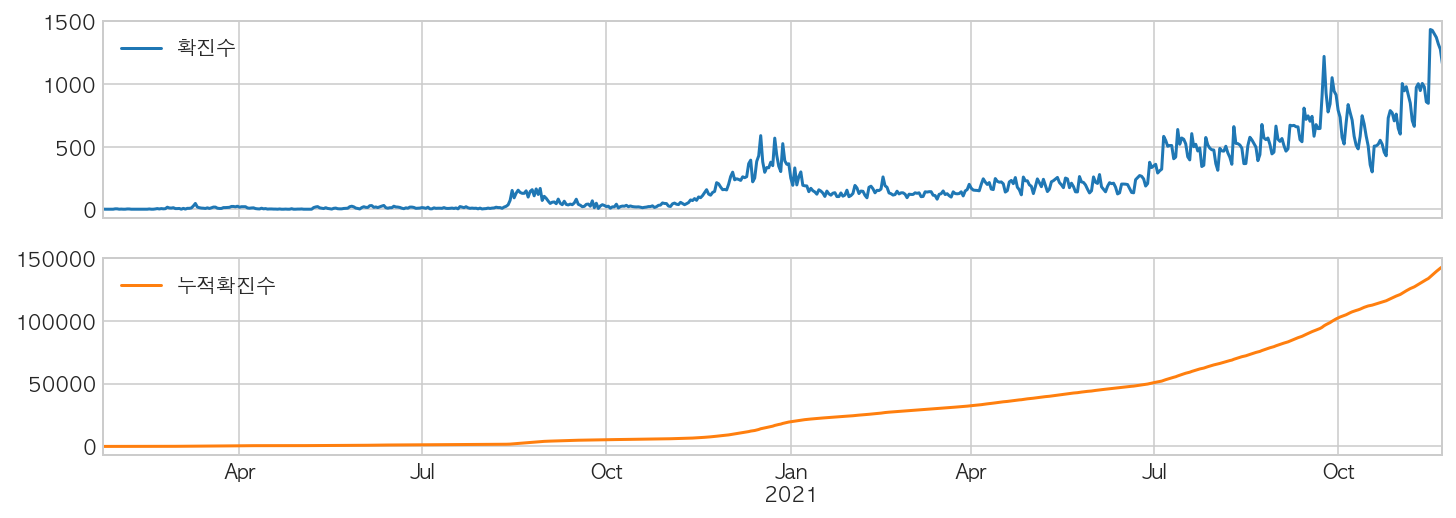

In [97]:
df_all_day.plot(subplots = True, figsize=(12,4))
plt.show()

# 푹꺼지는 날은 화요일. 월요일에 검사 맡고 화요일 결과 나오기 때문.

## 거주지

In [98]:
# 거주지 빈도수 구하기

df

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일,연도월,요일명
연번,,,,,,,,,,,,
142913,420784,2021-11-22,동대문구,-,감염경로 조사중,NaN,2021,11,22,0,2021-11,월
142912,420761,2021-11-22,양천구,-,감염경로 조사중,NaN,2021,11,22,0,2021-11,월
142911,420734,2021-11-22,송파구,-,기타 확진자 접촉,NaN,2021,11,22,0,2021-11,월
142910,420707,2021-11-22,양천구,-,기타 확진자 접촉,NaN,2021,11,22,0,2021-11,월
142909,420693,2021-11-22,영등포구,-,감염경로 조사중,NaN,2021,11,22,0,2021-11,월
...,...,...,...,...,...,...,...,...,...,...,...,...
5,9,2020-01-31,성북구,-,기타 확진자 접촉,퇴원,2020,1,31,4,2020-01,금
4,7,2020-01-30,마포구,중국,해외유입,퇴원,2020,1,30,3,2020-01,목
3,6,2020-01-30,종로구,-,종로구 집단발병,퇴원,2020,1,30,3,2020-01,목


In [100]:
df["거주지"].value_counts()

# 문제는 있는게 또있다. 스페이스바 같은 문제가 있다. 기타랑 타시도의 차이는 또 뭔데? 근데 별 차이가 없지 않나? 묶어버리자.

송파구     8791
강남구     8791
관악구     7487
구로구     7143
타시도     7137
영등포구    6884
강서구     6377
은평구     6021
성북구     5906
강동구     5899
노원구     5860
동대문구    5630
동작구     5577
서초구     5522
중랑구     5174
마포구     4953
양천구     4708
광진구     4628
강북구     4019
도봉구     3945
성동구     3898
서대문구    3722
용산구     3534
금천구     3531
기타      2741
종로구     2555
중구      2473
강서구        4
 노원구       1
성북구        1
용산구        1
Name: 거주지, dtype: int64

### 타시도, 기타 전처리

In [101]:
# "거주지" => "거주구"로 사본 생성!!! 원본을 다시 로드해야 할 수도 있도 비교해보기 위해서.
# df["거주구"]

df["거주구"] = df["거주지"]
df.head()

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일,연도월,요일명,거주구
연번,,,,,,,,,,,,,
142913,420784,2021-11-22,동대문구,-,감염경로 조사중,NaN,2021,11,22,0,2021-11,월,동대문구
142912,420761,2021-11-22,양천구,-,감염경로 조사중,NaN,2021,11,22,0,2021-11,월,양천구
142911,420734,2021-11-22,송파구,-,기타 확진자 접촉,NaN,2021,11,22,0,2021-11,월,송파구
142910,420707,2021-11-22,양천구,-,기타 확진자 접촉,NaN,2021,11,22,0,2021-11,월,양천구
142909,420693,2021-11-22,영등포구,-,감염경로 조사중,NaN,2021,11,22,0,2021-11,월,영등포구


In [104]:
# 텍스트 앞뒤 공백 제거하기

df["거주구"] = df["거주구"].str.strip()

In [107]:
# 타시도 => 기타로 변경하기
df["거주구"] = df["거주구"].str.replace("타시도", "기타")

In [108]:
# "거주구" 빈도수 구하기
df["거주구"].value_counts()

기타      9878
송파구     8791
강남구     8791
관악구     7487
구로구     7143
영등포구    6884
강서구     6381
은평구     6021
성북구     5907
강동구     5899
노원구     5861
동대문구    5630
동작구     5577
서초구     5522
중랑구     5174
마포구     4953
양천구     4708
광진구     4628
강북구     4019
도봉구     3945
성동구     3898
서대문구    3722
용산구     3535
금천구     3531
종로구     2555
중구      2473
Name: 거주구, dtype: int64

<AxesSubplot:>

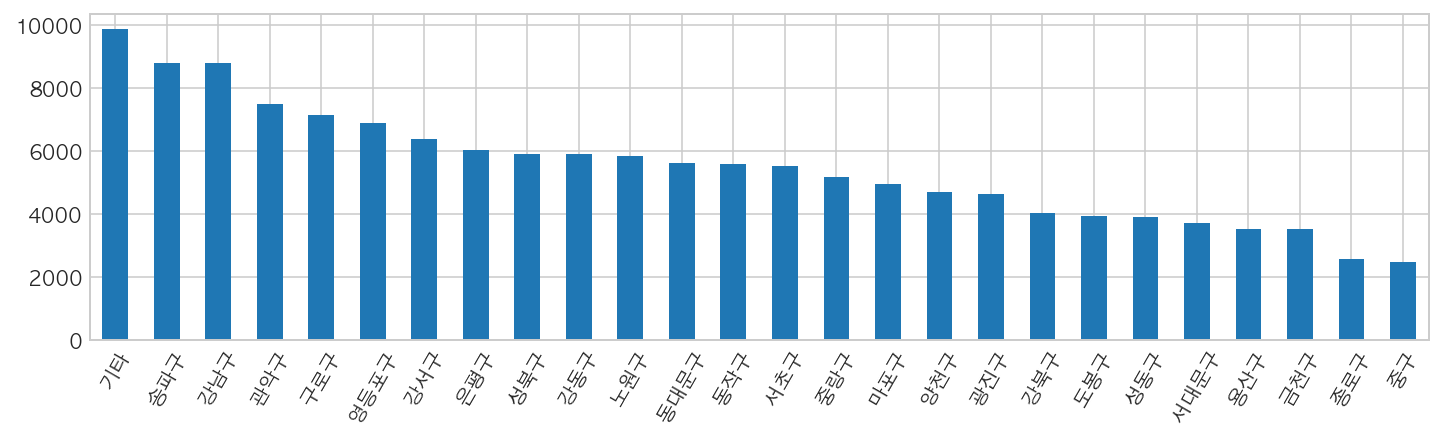

In [110]:
# gu_count 변수에 담긴 값 시각화 하기
# rot 은 기울어서 쓸 수 있도록 적는 것이에요.

gu_count = df["거주구"].value_counts()
gu_count.plot.bar(figsize=(12,3), rot=60)

## 두 개의 변수에 대한 빈도수 구하기
### 연도, 퇴원현황 두 개의 변수에 대한 빈도수 구하기

In [111]:
# pd.crosstab 으로 연도, 퇴원현황 두 개의 변수에 대한 빈도수 구하기
# 연도, 퇴원현황 빈도수 구하기

pd.crosstab(df["연도"], df["퇴원현황"])

퇴원현황,사망,퇴원
연도,,
2020,306,19058
2021,643,95743


In [112]:
# pd.crosstab 으로 연도, 퇴원현황 두 개의 변수에 대한 빈도 빈율 구하기

pd.crosstab(df["연도"], df["퇴원현황"], normalize = True) *100

퇴원현황,사망,퇴원
연도,,
2020,0.264363,16.464795
2021,0.555508,82.715335


전체 데이터에서 높은 것을 ..... 보기위해 한번 비율을 만들어보자.

In [113]:
df_yh = pd.crosstab(df["연도"], df["퇴원현황"])
df_yh['비율'] = df_yh['사망'] / df_yh['퇴원'] *100
df_yh

퇴원현황,사망,퇴원,비율
연도,,,
2020,306,19058,1.605625
2021,643,95743,0.671590


### 연도, 월 두 개의 변수에 대한 빈도수 구하기

실습으로 직접 해보기.

In [114]:
# pd.crosstab 으로 연도, 월 두 개의 변수에 대한 빈도수 구하기

pd.crosstab(df['연도'], df['월'])

월,1,2,3,4,5,6,7,8,9,10,11,12
연도,,,,,,,,,,,,
2020,7,80,391,156,229,459,281,2415,1306,733,2904,10431
2021,4879,4060,3898,5804,6028,6258,14504,15193,21383,18840,22674,0


<AxesSubplot:xlabel='연도'>

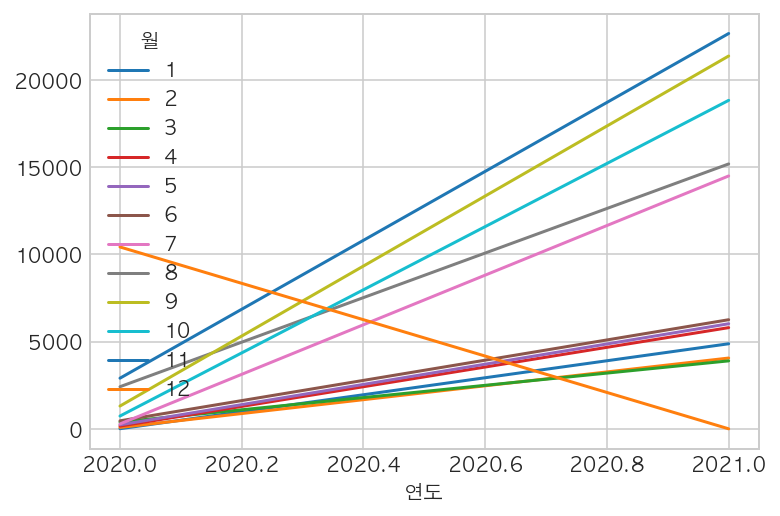

In [115]:
# 시각화 하기

df_ym_count = pd.crosstab(df['연도'], df['월'])
df_ym_count.plot()

#범주형이라 막대가 적절하다.

<AxesSubplot:xlabel='연도'>

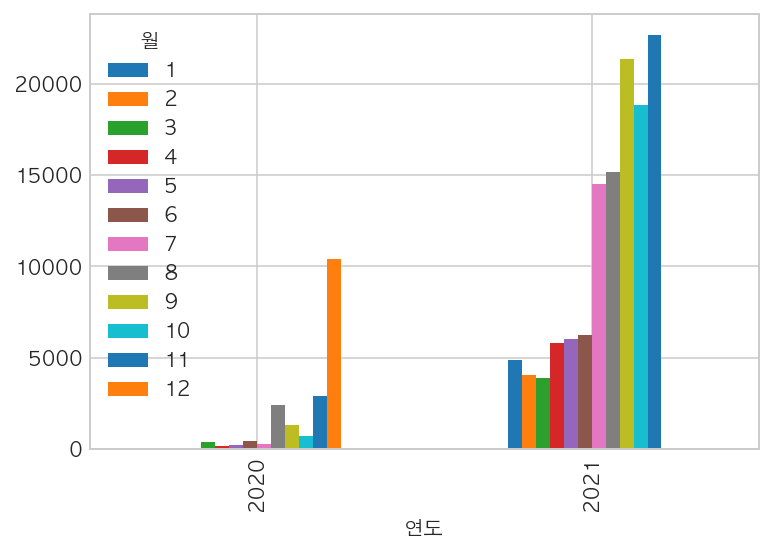

In [118]:
df_ym_count.plot.bar()


<AxesSubplot:xlabel='월'>

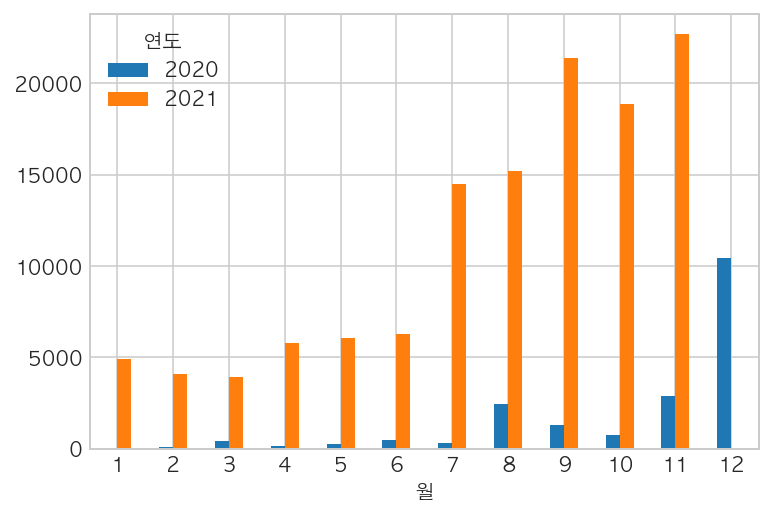

In [120]:
df_ym_count.T.plot.bar(rot=0) 

# 티가 뭐엿고 로트는 뭐였어 ..

### 연도, 요일 두 개의 변수에 대한 빈도수 구하기

In [122]:
# pd.crosstab 으로 연도, 요일 두 개의 변수에 대한 빈도수 구하기

yw = pd.crosstab(df['연도'], df['요일'])
yw

요일,0,1,2,3,4,5,6
연도,,,,,,,
2020,2626,2895,2890,3462,2700,2676,2143
2021,14523,19748,19073,18756,19037,17548,14836


In [123]:
# 리스트컴프리헨션 사용해서 리스트 만들기
# weekday_list

weekday_list = [w for w in "월화수목금토일"]
weekday_list

['월', '화', '수', '목', '금', '토', '일']

In [124]:
# 컬럼명 변경하기

yw.columns = weekday_list
yw

,월,화,수,목,금,토,일
연도,,,,,,,
2020,2626,2895,2890,3462,2700,2676,2143
2021,14523,19748,19073,18756,19037,17548,14836


<AxesSubplot:>

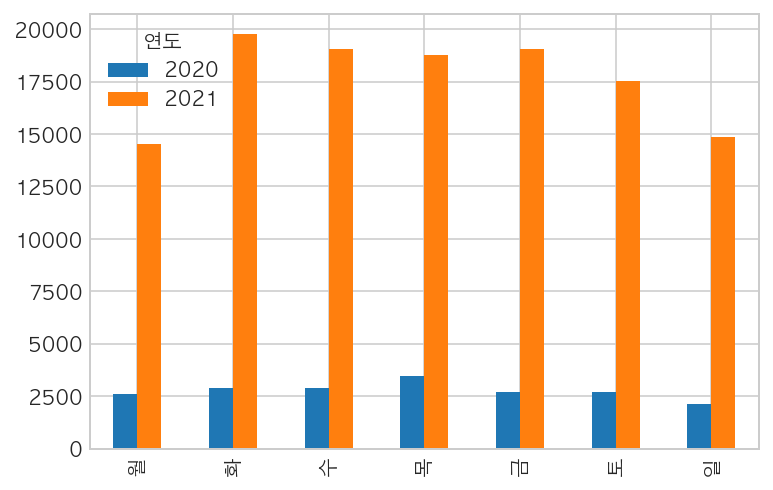

In [125]:
yw.T.plot.bar()

#요일별로 보고싶을 떄 T를 넣는다고 하셨다.
# seaborn에서는 카운트플롯.... 히스트플롯은 수치형에서 쓴다.

### 거주구, 연도월에 대한 빈도수 구하기

In [132]:
# pd.crosstab 으로 두 개 변수에 대한 빈도수 구하기
# 거주구, 연도월에 대한 빈도수 구하기

gu_ym = pd.crosstab(df['거주구'], df['연도월'])
gu_ym

# 시본은 계산해주지만 판다스는 계산은 안해준다. 그래서 따로 계산을 해서 넣어야 한다.
# 시본은 그냥 넣어도 알아서 연산해서 그래프를 그려준다. 플로리도 해준다.

연도월,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,...,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11
거주구,,,,,,,,,,,,,,,,,,,,,
강남구,0,7,34,23,11,8,15,88,84,87,...,118,240,428,529,792,1249,1287,1224,905,858
강동구,0,4,6,3,11,11,14,94,42,19,...,161,252,253,314,284,523,456,884,940,1071
강북구,0,0,5,0,9,10,4,85,31,15,...,124,125,133,266,164,348,333,568,649,690
강서구,1,1,20,4,19,33,25,117,65,22,...,96,133,217,189,213,576,652,895,711,1145
관악구,0,4,30,9,16,58,27,106,135,86,...,182,129,313,226,268,1132,1001,1064,802,1189
광진구,0,1,5,2,6,3,5,74,34,11,...,155,253,239,214,236,468,531,891,485,574
구로구,0,1,33,1,6,45,5,60,32,22,...,237,126,142,183,160,568,629,1424,1566,1304
금천구,0,1,11,0,3,17,7,34,20,5,...,69,26,84,146,103,334,375,595,656,745
기타,0,10,22,13,12,25,12,175,128,82,...,415,243,319,248,341,681,805,1206,1273,1432


In [135]:
# background_gradient() 로 빈도수 표현하기
# gu_ym.T.plot.bar(figsize=(20,5))
gu_ym.style.background_gradient()


연도월,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11
거주구,,,,,,,,,,,,,,,,,,,,,,,
강남구,0,7,34,23,11,8,15,88,84,87,156,422,226,118,240,428,529,792,1249,1287,1224,905,858
강동구,0,4,6,3,11,11,14,94,42,19,74,303,180,161,252,253,314,284,523,456,884,940,1071
강북구,0,0,5,0,9,10,4,85,31,15,41,245,174,124,125,133,266,164,348,333,568,649,690
강서구,1,1,20,4,19,33,25,117,65,22,305,729,213,96,133,217,189,213,576,652,895,711,1145
관악구,0,4,30,9,16,58,27,106,135,86,74,473,163,182,129,313,226,268,1132,1001,1064,802,1189
광진구,0,1,5,2,6,3,5,74,34,11,43,279,119,155,253,239,214,236,468,531,891,485,574
구로구,0,1,33,1,6,45,5,60,32,22,72,348,179,237,126,142,183,160,568,629,1424,1566,1304
금천구,0,1,11,0,3,17,7,34,20,5,27,201,72,69,26,84,146,103,334,375,595,656,745
기타,0,10,22,13,12,25,12,175,128,82,204,1620,612,415,243,319,248,341,681,805,1206,1273,1432


In [136]:
# gu_month.T 로 행과 열을 바꾼 뒤에 보기.티 붙이면 구가 컬럼으로 올라온다.
#  엑셀에서도 이런 기능이 있지만, 판다스에서 하는 게 훨씬 빠르게 된다.
# background_gradient()

gu_ym.T.style.background_gradient()

거주구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,기타,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
연도월,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,3,0,1
2020-02,7,4,0,1,4,1,1,1,10,8,0,1,1,0,4,4,3,1,12,1,1,0,7,8,0,0
2020-03,34,6,5,20,30,5,33,11,22,12,6,25,23,16,9,21,3,13,15,17,18,12,14,4,5,12
2020-04,23,3,0,4,9,2,1,0,13,3,3,5,7,7,6,13,13,9,10,3,4,6,7,1,1,3
2020-05,11,11,9,19,16,6,6,3,12,8,10,3,9,3,8,4,21,5,11,7,11,20,7,3,3,3
2020-06,8,11,10,33,58,3,45,17,25,13,43,4,13,12,8,15,9,4,7,42,29,12,18,3,3,14
2020-07,15,14,4,25,27,5,5,7,12,6,2,6,17,14,6,7,8,9,44,1,7,4,11,6,8,11
2020-08,88,94,85,117,106,74,60,34,175,192,73,74,110,79,52,79,33,244,161,78,67,48,122,37,30,103
2020-09,84,42,31,65,135,34,32,20,128,60,69,34,57,30,34,52,30,48,79,31,53,21,65,23,8,41


<AxesSubplot:xlabel='거주구', ylabel='연도월'>

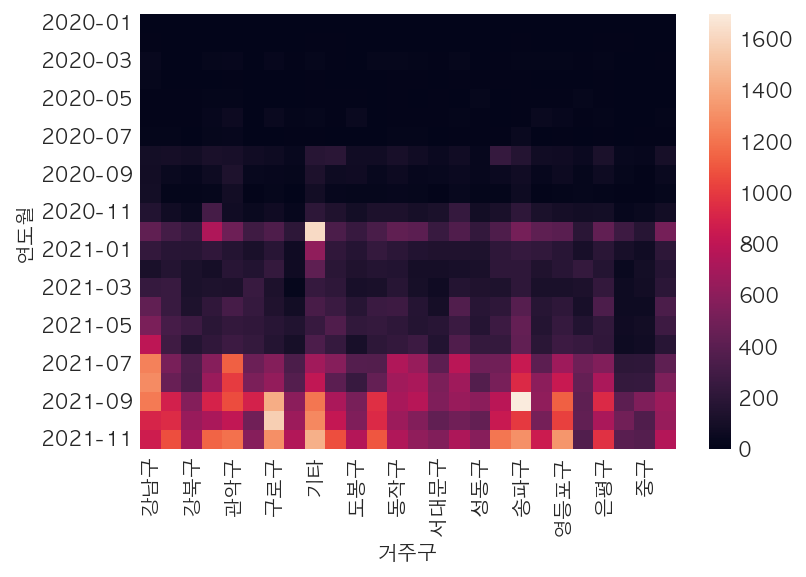

In [138]:
# 전체 자료수에서 많은 것을 표현하지는 않는다.
# 전체 자료에서 상대적 빈도를 볼 수 있도록 해보자.

import seaborn as sns

sns.heatmap(gu_ym.T)

<AxesSubplot:xlabel='거주구', ylabel='연도월'>

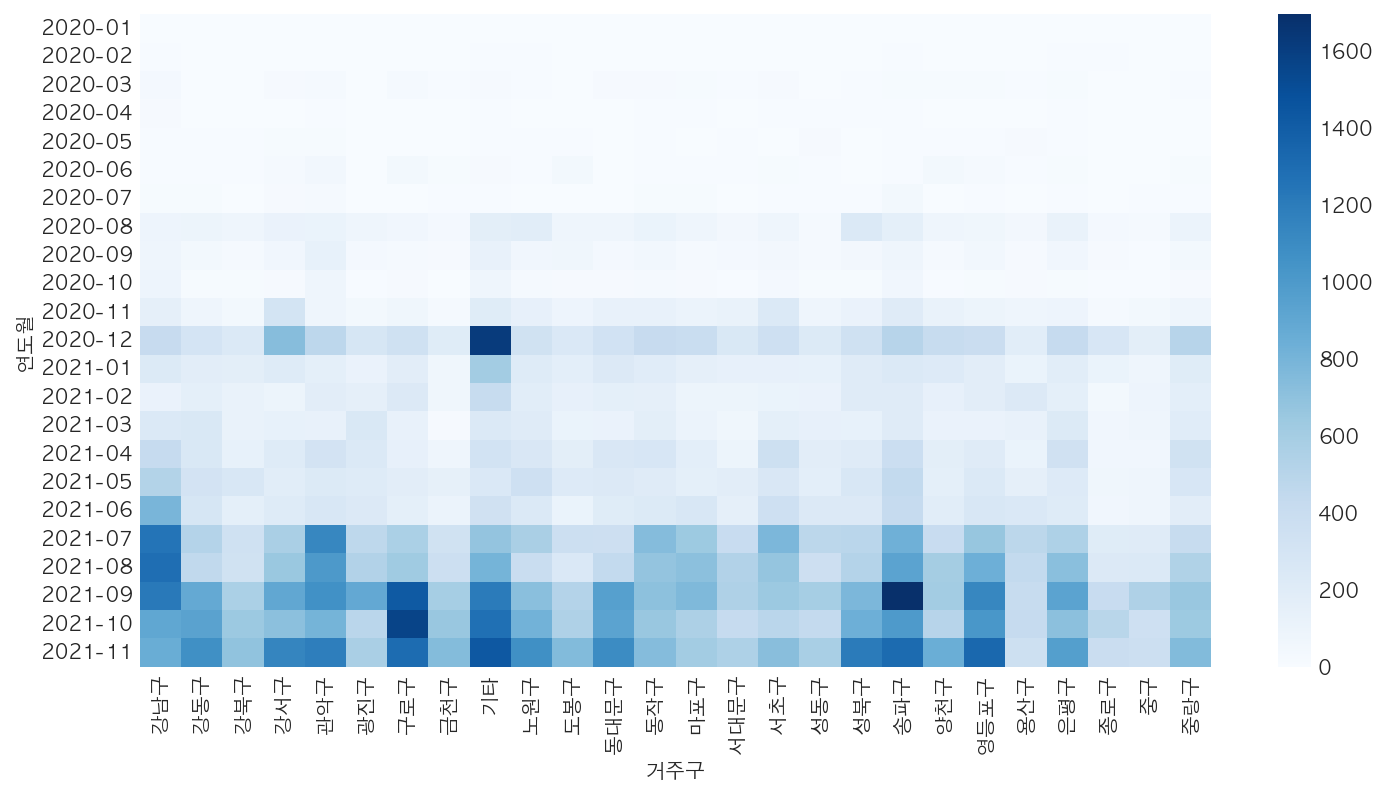

In [139]:
plt.figure(figsize=(12,6))
sns.heatmap(gu_ym.T, cmap='Blues')

# 판다스에서는 해당 열에서 어떤게 가장 빈도수가 많은지 표현해주고
# 시본에서 하면 전체 데이터프레임에서 빈도수를 많은 것을 표현해준다.
# 축을 바꾸면 또 다르게 표현해준다. 

## Boolean Indexing 으로 특정 조건 값 찾기
### 여러 조건 비교하기

In [143]:
# 강남구에서 "일요일"에 확진된 데이터만 찾기. gu_ym이 값이 좀 많잖아?
# .loc[행]
# .loc[행, 열]
# .loc[조건, 열]

gu_ym.loc[["강남구","송파구","서초구"], ["2020-02", "2020-08", "2020-12"]]

연도월,2020-02,2020-08,2020-12
거주구,,,
강남구,7,88,422
송파구,12,161,508
서초구,4,79,353


In [144]:
# 강남구의 가장 최근 값
gu_ym.loc["강남구","2021-11"]

858

In [146]:
gu_ym.loc["강남구",["2021-10","2021-11"]]

연도월
2021-10    905
2021-11    858
Name: 강남구, dtype: int64

In [151]:
# 거주구가 강남구이며, 여행력이 일본인 데이터 찾기

df.loc[(["거주구"]=="강남구")&(["여행력"]=="일본")]

# 나 뭐하냐고~

KeyError: 'False: boolean label can not be used without a boolean index'

In [152]:
df.loc[(df["거주구"]=="강남구")&(df["여행력"]=="일본")]

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일,연도월,요일명,거주구
연번,,,,,,,,,,,,,
71073,223580,2021-08-14,강남구,일본,해외유입,퇴원,2021,8,14,5,2021-08,토,강남구
47099,149511,2021-06-16,강남구,일본,해외유입,퇴원,2021,6,16,2,2021-06,수,강남구
31136,99978,2021-03-24,강남구,일본,감염경로 조사중,퇴원,2021,3,24,2,2021-03,수,강남구
12540,44037,2020-12-14,강남구,일본,해외유입,퇴원,2020,12,14,0,2020-12,월,강남구


In [153]:
# 변수에다 조건을 담아서 쓸 수도 있다.
강남 = (df["거주구"]=="강남구")
일본 = (df["여행력"]=="일본")

df[강남&일본]

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일,연도월,요일명,거주구
연번,,,,,,,,,,,,,
71073,223580,2021-08-14,강남구,일본,해외유입,퇴원,2021,8,14,5,2021-08,토,강남구
47099,149511,2021-06-16,강남구,일본,해외유입,퇴원,2021,6,16,2,2021-06,수,강남구
31136,99978,2021-03-24,강남구,일본,감염경로 조사중,퇴원,2021,3,24,2,2021-03,수,강남구
12540,44037,2020-12-14,강남구,일본,해외유입,퇴원,2020,12,14,0,2020-12,월,강남구


### str.contains 활용하기

In [159]:
# 접촉력의 영문자 검색을 위해 영문자를 모두 대문자로 만들고 "접촉력_대문자"컬럼을 생성하기
df["접촉력_대문자"] = df["접촉력"].str.upper()

In [160]:
# "접촉력_대문자" 컬럼으로 PC방 데이터를 찾고 접촉력 컬럼에 대해서만 빈도수 구하기
# loc[조건, 열]
df["접촉력_대문자"].str.contains("PC")

연번
142913    False
142912    False
142911    False
142910    False
142909    False
          ...  
5         False
4         False
3         False
2         False
1         False
Name: 접촉력_대문자, Length: 142913, dtype: bool

In [164]:
# 빈도수 구하기
df.loc[df["접촉력_대문자"].str.contains("PC"), "접촉력"]

연번
75268    용산구 소재 PC방 관련
74078    용산구 소재 PC방 관련
72913    용산구 소재 PC방 관련
72103    용산구 소재 PC방 관련
71924    용산구 소재 PC방 관련
             ...      
134       동대문관련(교회pc방)
128       동대문관련(교회pc방)
127       동대문관련(교회pc방)
124       동대문관련(교회pc방)
99        동대문관련(교회pc방)
Name: 접촉력, Length: 211, dtype: object

In [165]:
df.loc[df["접촉력_대문자"].str.contains("PC"), "접촉력"].value_counts()

# 데이터 입력하는 게 사람마다 다르다보니까 대소문자에 문제가 있을 수 있다.

용산구 소재 PC방 관련    82
강북구 소재 PC방 관련    35
강남구 소재 PC방 관련    32
강북구 소재 pc방 관련    23
동대문관련(교회pc방)     20
성동구 소재 PC방 관련    10
금천구 소재 PC방 관련     9
Name: 접촉력, dtype: int64

### isin 으로 여러 값 찾기

In [167]:
# isin 을 사용해 리스트로 여러 값을 찾아오기
# str.contains 와 다르게 정확히 일치하는 것만 가져온다.
# "거주구"가 "강남구", "서초구", "송파구" 인 데이터만 찾기
# loc를 통해 해당 조건의 "접촉력" 컬럼만 가져오기

df["거주구"].isin(["강남구", "서초구", "송파구"])

연번
142913    False
142912    False
142911     True
142910    False
142909    False
          ...  
5         False
4         False
3         False
2         False
1         False
Name: 거주구, Length: 142913, dtype: bool

In [168]:
# 불리언 형태면 리스트로 한 번 더 감싸주기. 
# sql의 in 과 같은 기능이다. 어떤게 좋다기보단 목적이 다르다.
# 특정 텍스트가 들어가는 것들을 찾고싶다면 str.contains 를 쓰는게 좋지만, 데이터 셋이 있고 완전히 일치하는 것만 찾고싶다면 isin이 낫다.
# 예를들어 정확히 일치하는 약품의 주성분 코드라던가.


df[df["거주구"].isin(["강남구", "서초구", "송파구"])]

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일,연도월,요일명,거주구,접촉력_대문자
연번,,,,,,,,,,,,,,
142911,420734,2021-11-22,송파구,-,기타 확진자 접촉,NaN,2021,11,22,0,2021-11,월,송파구,기타 확진자 접촉
142899,418595,2021-11-22,강남구,-,감염경로 조사중,NaN,2021,11,22,0,2021-11,월,강남구,감염경로 조사중
142843,418328,2021-11-22,송파구,-,기타 확진자 접촉,NaN,2021,11,22,0,2021-11,월,송파구,기타 확진자 접촉
142785,420754,2021-11-22,송파구,-,감염경로 조사중,NaN,2021,11,22,0,2021-11,월,송파구,감염경로 조사중
142777,420586,2021-11-22,송파구,-,감염경로 조사중,NaN,2021,11,22,0,2021-11,월,송파구,감염경로 조사중
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,787,2020-02-22,서초구,-,타시도 확진자 접촉,퇴원,2020,2,22,5,2020-02,토,서초구,타시도 확진자 접촉
30,780,2020-02-22,송파구,-,타시도 확진자 접촉,퇴원,2020,2,22,5,2020-02,토,송파구,타시도 확진자 접촉
26,420,2020-02-22,서초구,-,타시도 확진자 접촉,퇴원,2020,2,22,5,2020-02,토,서초구,타시도 확진자 접촉


In [169]:
# loc를 통해 해당 조건의 "접촉력" 컬럼만 가져오기 ???????

df[df["거주구"].isin(["강남구", "서초구", "송파구"])].loc[["접촉력"]]

KeyError: "None of [Index(['접촉력'], dtype='object', name='연번')] are in the [index]"

## 여행력

In [171]:
#  접촉력이 해외유입인 데이터에 대해 "해외유입" 변수 만들기

df["해외유입"] = (df["접촉력"] == "해외유입") #true and false 값들이 해외유입에 들어갈 것임.

In [172]:
# 거주구, 해외유입 빈도수 구하기

gu_oversea = pd.crosstab(df["거주구"], df['해외유입'])

In [175]:
# 거주구 해외유입 비율 구하기

gu_oversea["비율"] = gu_oversea[True] / gu_oversea[False] * 100
gu_oversea

#해외 유입이 더 많은 때도 분명 있었다..

해외유입,False,True,비율
거주구,,,
강남구,8619,172,1.995591
강동구,5837,62,1.062189
강북구,3998,21,0.525263
강서구,6286,95,1.511295
관악구,7432,55,0.740043
광진구,4585,43,0.937841
구로구,7109,34,0.478267
금천구,3514,17,0.483779
기타,9616,262,2.724626


<AxesSubplot:xlabel='거주구'>

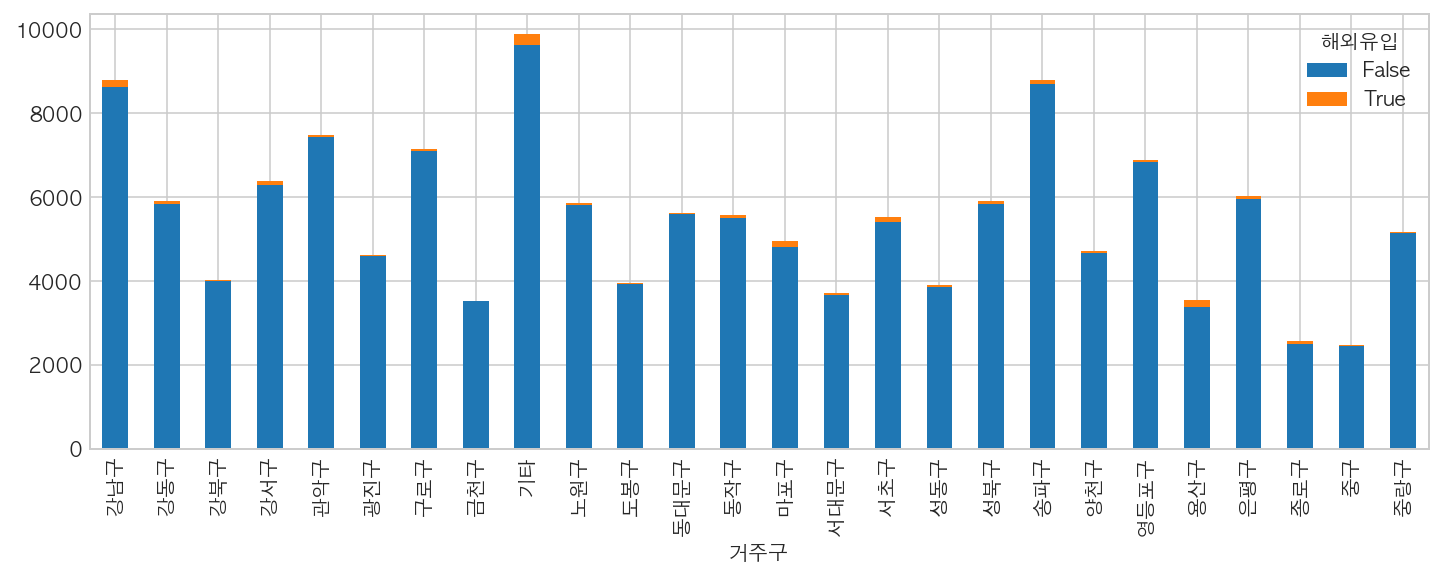

In [176]:
# 해외유입 여부에 따라 막대그래프를 그립니다.
# stacked=True 로 두 가지를 함께 그립니다.
# iloc 로 선택적 색인 해오기
# stacked = True 하면 위에 쌓아서 그리게 된다.

gu_oversea.iloc[:,:2].plot.bar(stacked=True, figsize=(12,4))

## pivot_table 사용하기

In [189]:
# 거주구별 해외유입 여부에 따른 빈도수 구하기
# gu_over_count
# pd.pivot_table(data=df, index =["day", "smoker"], values = "size").agg(['count','mean'])

gu_over_count = pd.pivot_table(data = gu_oversea, index=["거주구"], columns=["해외유입"])
gu_over_count

KeyError: '해외유입'

In [191]:
# 거주구별 해외유입 여부에 따른 빈도수 구하기
# gu_over_count
# 기본은 평균이라 막 소수점 나오고 모든값이 필요한게 아니니 환자수 만 한다.

#머신러닝에서 값을 트루폴스로 만들어놓으면 범주가 많은데 특정변수를 파생변수로 만들어서 넣어서 학습시키기도 한다고.

pd.pivot_table(data=df, index="거주구", columns = "해외유입", aggfunc = "count", values="환자")

해외유입,False,True
거주구,,
강남구,8619,172
강동구,5837,62
강북구,3998,21
강서구,6286,95
관악구,7432,55
광진구,4585,43
구로구,7109,34
금천구,3514,17
기타,9616,262


In [199]:
weekday_list

['월', '화', '수', '목', '금', '토', '일']

In [203]:
 # 구별로 어떤 요일에 많이 나올까?

# pd.pivot_table(data=df, index="거주구", columns = "해외유입", aggfunc = "count", values="환자")
gu_week = pd.pivot_table(data=df, index = "거주구", columns = "요일명", aggfunc = "count", values = "환자")
gu_week = gu_week[weekday_list]

In [207]:
# 거주구에 따른 요일별 확진자 빈도수
# df_gu_weekday[weekday_list].style.bar()

gu_week[weekday_list].style.bar()

요일명,월,화,수,목,금,토,일
거주구,,,,,,,
강남구,1136,1431,1374,1283,1379,1179,1009
강동구,671,936,936,896,875,858,727
강북구,572,608,608,634,596,527,474
강서구,797,967,947,1012,1043,891,724
관악구,784,1271,1212,1103,1159,1093,865
광진구,589,737,704,723,665,638,572
구로구,873,1137,1080,1113,1102,1017,821
금천구,388,524,514,555,583,523,444
기타,1237,1414,1526,1900,1366,1383,1052


우리는 걸린 사람들 중에 사망하지 않은 사람 분의 사망한 사람을 치사율로 보았다.

이것도 보는 사람 따라 다를 수 있다.

## groupby 사용하기

In [217]:
# "거주구", "해외유입" 으로 그룹화 하여 "환자" 컬럼으로 빈도수 구하기
# df.groupby(["day", "smoker"])["size"].agg(["count","mean"])

gu_oversea = df.groupby(by=["거주구","해외유입"])["환자"].count()
gu_oversea

# 멀티 인덱스 상태이다. 치트시트에서 보셈. ㅎㅎ

거주구   해외유입 
강남구   False    8619
      True      172
강동구   False    5837
      True       62
강북구   False    3998
      True       21
강서구   False    6286
      True       95
관악구   False    7432
      True       55
광진구   False    4585
      True       43
구로구   False    7109
      True       34
금천구   False    3514
      True       17
기타    False    9616
      True      262
노원구   False    5805
      True       56
도봉구   False    3915
      True       30
동대문구  False    5593
      True       37
동작구   False    5488
      True       89
마포구   False    4820
      True      133
서대문구  False    3656
      True       66
서초구   False    5396
      True      126
성동구   False    3852
      True       46
성북구   False    5823
      True       84
송파구   False    8701
      True       90
양천구   False    4659
      True       49
영등포구  False    6832
      True       52
용산구   False    3388
      True      147
은평구   False    5962
      True       59
종로구   False    2483
      True       72
중구    False    2436
      Tr

### Groupby의 unstack()
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html

<img src="https://pandas.pydata.org/docs/_images/reshaping_unstack.png" width="600">

In [218]:
# "거주구", "해외유입" 으로 그룹화 하여 "환자" 컬럼으로 빈도수 구하고
# 마지막 인덱스를 컬럼으로 만들기

df_gu_oversea = gu_oversea.unstack()
df_gu_oversea


해외유입,False,True
거주구,,
강남구,8619,172
강동구,5837,62
강북구,3998,21
강서구,6286,95
관악구,7432,55
광진구,4585,43
구로구,7109,34
금천구,3514,17
기타,9616,262


In [225]:
# 연도, 월을 멀티인덱스로 사용하는 빈도수 구하기

ym_infector = df.groupby(["연도","월"])["환자"].count()
ym_infector

연도    월 
2020  1         7
      2        80
      3       391
      4       156
      5       229
      6       459
      7       281
      8      2415
      9      1306
      10      733
      11     2904
      12    10431
2021  1      4879
      2      4060
      3      3898
      4      5804
      5      6028
      6      6258
      7     14504
      8     15193
      9     21383
      10    18840
      11    22674
Name: 환자, dtype: int64

In [226]:
# unstack()으로 월을 컬럼으로 만들기

df_ym_infector.unstack()

월,1,2,3,4,5,6,7,8,9,10,11,12
연도,,,,,,,,,,,,
2020,7.0,80.0,391.0,156.0,229.0,459.0,281.0,2415.0,1306.0,733.0,2904.0,10431.0
2021,4879.0,4060.0,3898.0,5804.0,6028.0,6258.0,14504.0,15193.0,21383.0,18840.0,22674.0,NaN


In [ ]:
# df.groupby(["연도","월"])["환자"].count().unstack() 으로 쓰셨다. 나는 변수에다 넣었지만...!

In [229]:
# ["연도", "월"] 로 그룹화 하고 "해외유입" 의 describe 값 보기

df.groupby(["연도", "월"])["해외유입"].describe()

count unique    top   freq
연도   월                             
2020 1       7      2  False      4
     2      80      2  False     71
     3     391      2  False    262
     4     156      2   True    111
     5     229      2  False    204
     6     459      2  False    436
     7     281      2  False    242
     8    2415      2  False   2365
     9    1306      2  False   1283
     10    733      2  False    689
     11   2904      2  False   2821
     12  10431      2  False  10321
2021 1    4879      2  False   4730
     2    4060      2  False   3928
     3    3898      2  False   3834
     4    5804      2  False   5724
     5    6028      2  False   5953
     6    6258      2  False   6152
     7   14504      2  False  14341
     8   15193      2  False  15004
     9   21383      2  False  21249
     10  18840      2  False  18724
     11  22674      2  False  22561

최빈값이 국내유입보다 해외유입이 많은 때도 있었다. 그게 2020-04 True가 떴다!